# PART 1 - MACHINE LEARNING

In [54]:
import matplotlib.pyplot as plt
import pandas
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

## Task 1.1 - Data preparation

In [55]:
data = pandas.read_csv("glass_dataset.csv")

targets = data["Type"]
inputs = data.drop("Type", axis=1)

In [56]:
print(data.head())
print(data.columns)

        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1
Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')


In [57]:
print("targets", targets)
print("inputs", inputs)

targets 0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64
inputs           RI     Na    Mg    Al     Si     K    Ca    Ba   Fe
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0
..       ...    ...   ...   ...    ...   ...   ...   ...  ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0

[214 rows x 9 columns]


In [73]:
scaler = StandardScaler()
scaled_inputs = scaler.fit_transform(inputs)

# Task 1.2 - Classification

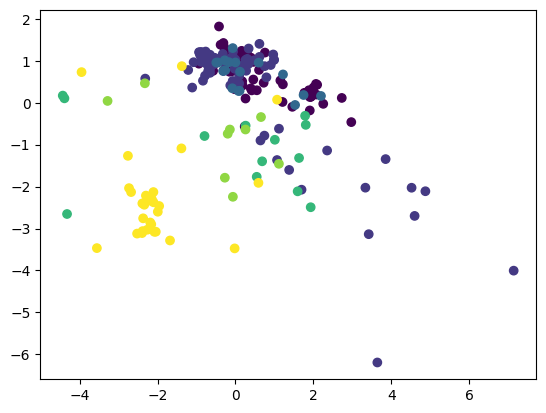

In [74]:
# project into 2d
pca = PCA(n_components=2)
compressed = pca.fit_transform(scaled_inputs)

# train the classifier
classifier = KNeighborsClassifier(n_neighbors=1).fit(scaled_inputs, targets)
classifiedData = classifier.predict(scaled_inputs)

# plot the data
plt.figure()
plt.scatter(compressed[:,0], compressed[:,1], c=classifiedData)
plt.show()

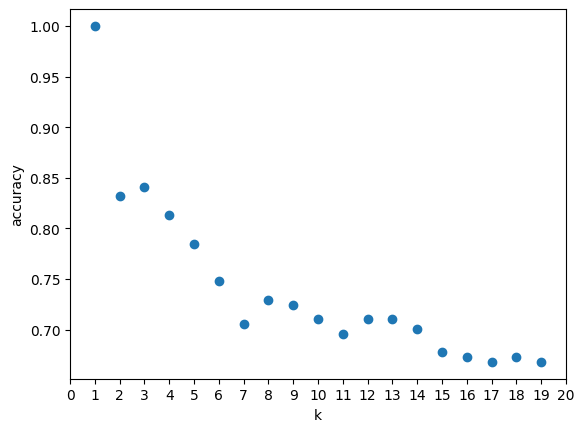

In [75]:
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(scaled_inputs, targets)
    scores.append(knn.score(scaled_inputs, targets))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks ([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
plt.show()

In [141]:
xtrain, xtest, ttrain, ttest = train_test_split(compressed, targets, random_state=42)

classifier = SVC(kernel='linear', gamma='auto')
classifier.fit(xtrain, ttrain)
ytrain = classifier.predict(xtrain)
ytest = classifier.predict(xtest)

trainAccuracy = accuracy_score(ttrain, ytrain)
testAccuracy = accuracy_score(ttest, ytest)
print(f"{trainAccuracy=:.2f} train accuracy {testAccuracy=:.2f} test accuracy")

# the following accuracy results were obtained with gamma = 'auto':
# linear kernel: 0.55 train accuracy 0.61 test accuracy
# poly kernel, degree 2: 0.61 train accuracy 0.67 test accuracy
# poly kernel, degree 3: 0.54 train accuracy 0.46 test accuracy
# rbf kernel: 0.67 train accuracy 0.65 test accuracy

trainAccuracy=0.55 train accuracy testAccuracy=0.61 test accuracy


# Task 1.3 - Assessment of classification